### Using two datasets you find from the internet, do the following for each

In [1136]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

### 1) Open your dataset up using pandas in a Jupyter notebook

In [1137]:
df = pd.read_csv('Mother Jones US Mass Shootings 1982-2016 - US mass shootings.csv')

### 2) Do a .head() to get a feel for your data

In [1138]:
df.head()

,Case,Location,Date,Year,Summary,Fatalities,Wounded,Total victims,Venue,Prior signs of possible mental illness,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Dallas police shooting,"Dallas, Texas",7/7/2016,2016,"Micah Xavier Johnson, a 25-year-old Army veter...",5,11,16,Other,(pending),...,online and or gun show,"Semiautomatic rifle, semiautomatic handguns",Izhmash-Saiga 5.45mm (AK-style) semiautomatic ...,Black,M,http://www.nytimes.com/2016/07/11/us/dallas-sh...,NaN,NaN,NaN,Mass
1,Orlando nightclub massacre,"Orlando, Florida",6/12/2016,2016,"Omar Mateen, 29, attacked the Pulse nighclub i...",49,53,102,Other,(pending),...,"Shooting center in Port St. Lucie, Florida","Semiautomatic rifle, semiautomatic handgun","Sig Sauer MCX rifle, Glock 17 9mm; high-capaci...",Other,M,http://www.motherjones.com/politics/2016/06/as...,NaN,NaN,NaN,Mass
2,Excel Industries mass shooting,"Hesston, Kansas",2/25/2016,2016,"Cedric L. Ford, who worked as a painter at a m...",3,14,17,Workplace,Unclear,...,NaN,"Semiautomatic rifle, semiautomatic handgun","Zastava Serbia AK-47-style rifle, Glock Model ...",Black,M,http://www.nytimes.com/2016/02/26/us/shooting-...,NaN,NaN,NaN,Spree
3,Kalamazoo shooting spree,"Kalamazoo County, Michigan",2/20/2016,2016,"Jason B. Dalton, a driver for Uber, apparently...",6,2,8,Other,Unclear,...,NaN,Semiautomatic handgun,9 mm handgun (ammo used unclear),White,M,http://www.nytimes.com/2016/02/22/us/kalamazoo...,NaN,NaN,NaN,Spree
4,San Bernardino mass shooting,"San Bernardino, California",12/2/2015,2015,Syed Rizwan Farook left a Christmas party held...,14,21,35,\nWorkplace,Unclear,...,The suspects purchased their handguns in the U...,Two assault rifles and two semi-automatic pist...,Two semiautomatic AR-15-style rifles—one a DPM...,Other,Male & Female,http://www.motherjones.com/mojo/2015/12/san-be...,NaN,NaN,NaN,Mass


In [1139]:
df.columns

Index(['Case', 'Location', 'Date', 'Year', 'Summary', 'Fatalities', 'Wounded',
       'Total victims', 'Venue', 'Prior signs of possible mental illness',
       'Mental Health', 'Weapons obtained legally', 'Where obtained',
       'Type of weapons', 'Weapon details', 'Race', 'Gender', 'Sources',
       'Mental Health Sources', 'latitude', 'longitude', 'Type'],
      dtype='object')

### 3) Write down 12 questions to ask your data, or 12 things to hunt for in the data
1. Are more weapons obtained legally or illegally?
2. Where are most weapons obtained?
3. What state has the most mass shootings?
4. Which mass shooting had the most wounded? / How many wounded?
5. Which mass shootings had the most victims?
6. What mass shooting was most fatal? 
7. What kind of weapons were used in the most fatal shootings? Are glocks used more often than not?
8. What kind of weapons were used in the shootings that had the most victims (wounded and fatal)?
9. How many shooters showed prior signs of mental illness? 
10. In which kind of venue do most mass shootings occur? 
11. What kind of weapons are most common? 
12. What is the gender of most people who carry out mass shootings?

### 4) Attempt to answer those ten questions using the magic of pandas:

#### 1) Are more weapons obtained legally or illegally?

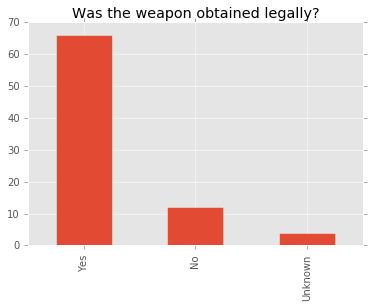

In [1140]:
df['Weapons obtained legally'] = df['Weapons obtained legally'].str.replace('\nYes', 'Yes')
df['Weapons obtained legally'] = df['Weapons obtained legally'].str.replace('Yes\s.+','Yes')
df['Weapons obtained legally'] = df['Weapons obtained legally'].str.replace('Yes ','Yes')
df['Weapons obtained legally'].str.strip()

ax = df['Weapons obtained legally'].value_counts().plot(kind='bar', title='Was the weapon obtained legally?')

#### 2) Where are most weapons obtained?

In [1141]:
df['Gun Show'] = df['Where obtained'].str.contains('[Ss]how', na=False)
df['Online'] = df['Where obtained'].str.contains('[Oo]nline') | df['Where obtained'].str.contains('[Ii]nternet')
df['Family/Friends'] = df['Where obtained'].str.contains('[Gg]randfather')| df['Where obtained'].str.contains('[Mm]other') | df['Where obtained'].str.contains('[Ff]ather') | df['Where obtained'].str.contains('[Ff]riend') | df['Where obtained'].str.contains('[Ii]ndividual')
df['Store/Retailer'] = df['Where obtained'].str.contains('Trading')| df['Where obtained'].str.contains('[Ss]ports') | df['Where obtained'].str.contains('Big')| df['Where obtained'].str.contains('[Ss]portsman') | df['Where obtained'].str.contains("[Ss]portsman's") | df['Where obtained'].str.contains('[Ff]irearms') | df['Where obtained'].str.contains('Gander') | df['Where obtained'].str.contains('Galore')| df['Where obtained'].str.contains('[Dd]ealer') | df['Where obtained'].str.contains('[Ss]upply') | df['Where obtained'].str.contains('Fin') | df['Where obtained'].str.contains('[Ss]tore') | df['Where obtained'].str.contains('[Ss]tores') | df['Where obtained'].str.contains('[Cc]enter') |df['Where obtained'].str.contains('[Pp]awn') | df['Where obtained'].str.contains('[Rr]etailer') | df['Where obtained'].str.contains('[Rr]etailers') | df['Where obtained'].str.contains('[Ff]lea') | df['Where obtained'].str.contains('[Ss]uppliers') | df['Where obtained'].str.contains('[Rr]ange') | df['Where obtained'].str.contains("Frank's") | df['Where obtained'].str.contains("Frank's") | df['Where obtained'].str.contains("[Ss]upplies") | df['Where obtained'].str.contains("Frank's") | df['Where obtained'].str.contains('[Ss]ales') | df['Where obtained'].str.contains('[Ww]arehouse') | df['Where obtained'].str.contains('Bullseye' )| df['Where obtained'].str.contains('Outdoorsman')
df['Stolen'] = df['Where obtained'].str.contains('[Ss]tolen') | df['Where obtained'].str.contains('[Bb]urglary') 
df['Unknown'] = df['Where obtained'].str.contains('Unknown') | df['Where obtained'].str.contains('Unclear') | df['Where obtained'].isnull()
df['Issued'] = df['Where obtained'].str.contains('[Ii]ssued', na=False)
df['Other'] = df['Where obtained'].str.contains('[Th]ird party', na=False) | df['Where obtained'].str.contains('[Aa]ssembled', na=False)
df

,Case,Location,Date,Year,Summary,Fatalities,Wounded,Total victims,Venue,Prior signs of possible mental illness,...,longitude,Type,Gun Show,Online,Family/Friends,Store/Retailer,Stolen,Unknown,Issued,Other
0,Dallas police shooting,"Dallas, Texas",7/7/2016,2016,"Micah Xavier Johnson, a 25-year-old Army veter...",5,11,16,Other,(pending),...,NaN,Mass,True,True,False,False,False,False,False,False
1,Orlando nightclub massacre,"Orlando, Florida",6/12/2016,2016,"Omar Mateen, 29, attacked the Pulse nighclub i...",49,53,102,Other,(pending),...,NaN,Mass,False,False,False,True,False,False,False,False
2,Excel Industries mass shooting,"Hesston, Kansas",2/25/2016,2016,"Cedric L. Ford, who worked as a painter at a m...",3,14,17,Workplace,Unclear,...,NaN,Spree,False,False,False,False,False,True,False,False
3,Kalamazoo shooting spree,"Kalamazoo County, Michigan",2/20/2016,2016,"Jason B. Dalton, a driver for Uber, apparently...",6,2,8,Other,Unclear,...,NaN,Spree,False,False,False,False,False,True,False,False
4,San Bernardino mass shooting,"San Bernardino, California",12/2/2015,2015,Syed Rizwan Farook left a Christmas party held...,14,21,35,\nWorkplace,Unclear,...,NaN,Mass,False,False,False,False,False,False,False,True
5,Planned Parenthood clinic,"Colorado Springs, Colorado",11/27/2015,2015,"Robert Lewis Dear, 57, shot and killed a polic...",3,9,12,Workplace,Unclear,...,NaN,Mass,False,False,False,False,False,True,False,False
6,Colorado Springs shooting rampage,"Colorado Springs, Colorado",10/31/2015,2015,"Noah Harpham, 33, shot three people before dea...",3,0,3,Other,Unclear,...,NaN,Spree,False,False,False,False,False,True,False,False
7,Umpqua Community College shooting,"Roseburg, Oregon",10/1/2015,2015,26-year-old Chris Harper Mercer opened fire a...,9,9,18,School,Unclear,...,NaN,Mass,False,False,True,False,False,False,False,False
8,Chattanooga military recruitment center,"Chattanooga, Tennessee",7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,Unclear,...,-85.311819,Mass,False,True,False,False,False,False,False,False
9,Charleston Church Shooting,"Charleston, South Carolina",6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,unknown,...,-79.933143,Mass,False,False,False,True,False,False,False,False


In [1142]:
df['Gun Show'].value_counts()

False    80
True      2
Name: Gun Show, dtype: int64

In [1143]:
df['Online'].value_counts()

False    78
True      4
Name: Online, dtype: int64

In [1144]:
df['Family/Friends'].value_counts()

False    68
True     14
Name: Family/Friends, dtype: int64

In [1145]:
df['Store/Retailer'].value_counts()

False    42
True     40
Name: Store/Retailer, dtype: int64

In [1146]:
df['Stolen'].value_counts()

False    75
True      7
Name: Stolen, dtype: int64

In [1147]:
df['Issued'].value_counts()

False    80
True      2
Name: Issued, dtype: int64

In [1148]:
df['Unknown'].value_counts()

False    60
True     22
Name: Unknown, dtype: int64

#### 3) Where state has the most mass shootings?

In [1149]:
# create empty list
states = []

# split the string values in location such that city, state become tuples 
# iterate over list of tuples, appending only the state to the above list 
for item in df['Location'].str.split(','): 
    states.append(item[1])

# create series by setting series equal to the list 
df['State'] = pd.Series(states)

# value counts on the series 
df['State'].value_counts().head(5)

 California    13
 Florida        7
 Texas          7
 Washington     6
 Colorado       5
Name: State, dtype: int64

#### 4) Which mass shooting had the most wounded? / How many were wounded?

In [1150]:
df['Wounded'].idxmax() # returns index of maximum of values in a series
df['Case'].iloc[23]

'Aurora theater shooting'

In [1151]:
df['Wounded'].iloc[23]

58

#### 5) Which mass shootings had the most victims?

In [1152]:
df['Total victims'].idxmax()
df['Case'].iloc[23]

'Aurora theater shooting'

#### 6) What mass shooting was most fatal?

In [1153]:
df['Fatalities'].idxmax() # returns index of maximum of values in a series

1

In [1154]:
df['Case'].iloc[1]

'Orlando nightclub massacre'

#### 7) What kind of weapons were used in the most fatal shootings? / Do shooters use a glock more often than not?

In [1155]:
df['Weapon details'].iloc[1] #case = Orlando nightclub 

'Sig Sauer MCX rifle, Glock 17 9mm; high-capacity magazines (30 rounds)'

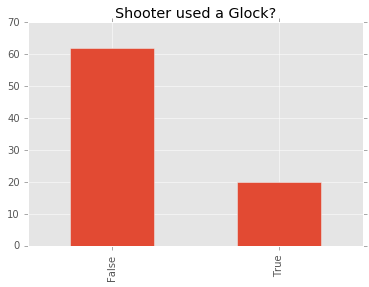

In [1156]:
df['Glock'] = df['Weapon details'].str.contains('[Gg]locks') | df['Weapon details'].str.contains('[Gg]lock')
df['Glock'].value_counts().plot(kind='bar', title = 'Shooter used a Glock?')

#### 8) What kind of weapons were used in the shootings that had the most victims (wounded and fatal)?

In [1159]:
df['Weapon details'].iloc[23]

'Two .40-caliber Glock semiautomatic handguns; .223-caliber Smith & Wesson M&P15 semiautomatic rifle; 12-gauge Remington 870 pump-action shotgun'

#### 9) How many shooters showed prior signs of mental illness? 

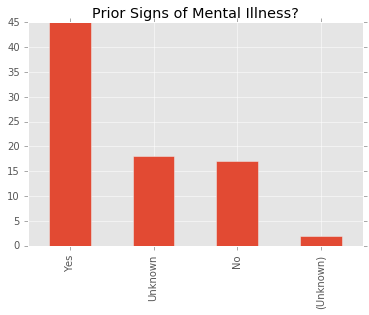

In [1157]:
df['Prior signs of possible mental illness'].value_counts()
df['Prior signs of possible mental illness'] = df['Prior signs of possible mental illness'].str.replace('Unclear', 'Unknown')
df['Prior signs of possible mental illness']= df['Prior signs of possible mental illness'].str.replace('unknown', 'Unknown')
df['Prior signs of possible mental illness']= df['Prior signs of possible mental illness'].str.replace('(pending)', 'Unknown')
df['Prior signs of possible mental illness']= df['Prior signs of possible mental illness'].str.replace('(Unknown) ', 'Unknown')
df['Prior signs of possible mental illness']= df['Prior signs of possible mental illness'].str.replace('(Unknown)', 'Unknown')
df['Prior signs of possible mental illness']= df['Prior signs of possible mental illness'].str.strip()
df['Prior signs of possible mental illness'].value_counts().plot(kind='bar', title = 'Prior Signs of Mental Illness?')

#### 10) In which kind of venue do most mass shootings occur?

In [1158]:
df['Venue'] = df['Venue'].str.replace('Other\n', 'Other')
df['Venue'] = df['Venue'].str.replace('\nWorkplace', 'Workplace')
df['Venue'].value_counts()

Other        35
Workplace    23
School       15
Military      5
Religious     4
Name: Venue, dtype: int64